## Agrupar clientes en una ciudad mediante K-means

Utilizando el módulo KMeans de scikit-learn

Referencias:
- El algoritmo k-means aplicado a clasificación y procesamiento de imágenes

Computación Numerica - Universidad de Oviedo - Departamento de Matemáticas.
https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html

- Definitive Guide to K-Means Clustering with Scikit-Learn

Cássia Sampaio - StackAbuse.
https://stackabuse.com/k-means-clustering-with-scikit-learn/

- (3) Best Practices Using Geocoding API Web Services

https://developers.google.com/maps/documentation/geocoding/web-service-best-practices?hl=en

In [182]:
import openpyxl
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import urllib.request
import urllib.parse

In [183]:
print(f'The scikit-learn version is {sklearn.__version__}')

The scikit-learn version is 1.1.2


In [191]:
arch = 'Nómina de Clientes'
clientes = pd.read_excel(f'./{arch}.xlsx', index_col=0,
                         na_values=[" "],
                         dtype={'cod_cliente': str, 'nombre_comercial': str, 'domicilio': str, 'ciudad': str, 'cod_postal': str, 'provincia': str},
                         usecols=['cod_cliente', 'nombre_comercial', 'domicilio', 'ciudad', 'cod_postal', 'provincia'])
clientes.head()

,nombre_comercial,domicilio,ciudad,cod_postal,provincia
cod_cliente,,,,,
010001,BUSCAVIDAS,SAN LORENZO 52,Gaiman,9105,Chubut
010002,DOÑA AMELIA,28 DE JULIO 641,Gaiman,9105,Chubut
010003,EL COLO,BROWN 928,Gaiman,9105,Chubut
010004,EL GATO DE LA AVENIDA,TELLO 643,Gaiman,9105,Chubut
010005,FRUTILLITAS,COM. ESPORA 21,Gaiman,9105,Chubut


In [192]:
clientes.dropna(inplace=True)
clientes.head()

,nombre_comercial,domicilio,ciudad,cod_postal,provincia
cod_cliente,,,,,
010001,BUSCAVIDAS,SAN LORENZO 52,Gaiman,9105,Chubut
010002,DOÑA AMELIA,28 DE JULIO 641,Gaiman,9105,Chubut
010003,EL COLO,BROWN 928,Gaiman,9105,Chubut
010004,EL GATO DE LA AVENIDA,TELLO 643,Gaiman,9105,Chubut
010005,FRUTILLITAS,COM. ESPORA 21,Gaiman,9105,Chubut


Normalizar los nombres de localidades

In [193]:
clientes['ciudad'] = clientes.apply(lambda row: row['ciudad'].upper().strip(), axis=1)
clientes.head()

,nombre_comercial,domicilio,ciudad,cod_postal,provincia
cod_cliente,,,,,
010001,BUSCAVIDAS,SAN LORENZO 52,GAIMAN,9105,Chubut
010002,DOÑA AMELIA,28 DE JULIO 641,GAIMAN,9105,Chubut
010003,EL COLO,BROWN 928,GAIMAN,9105,Chubut
010004,EL GATO DE LA AVENIDA,TELLO 643,GAIMAN,9105,Chubut
010005,FRUTILLITAS,COM. ESPORA 21,GAIMAN,9105,Chubut


Filtrar los clientes por la ciudad a estudiar

In [194]:
city = "'TRELEW'"
clientes = clientes.query('ciudad == '+ city)
clientes.head()

,nombre_comercial,domicilio,ciudad,cod_postal,provincia
cod_cliente,,,,,
020018,"GAUNA, MARCELO DAVID",PASAJE LOS ANDES 1370,TRELEW,9100,Chubut
020020,SEC - SIND. EMPL. DE COMERCIO,TRELEW,TRELEW,9100,Chubut
020031,UCR COMITE PROVINCA DEL CHUBUT,MORENO 433,TRELEW,9100,Chubut
020041,LA MADRILEÑA S.A.,BELGRANO 280 PISO 1,TRELEW,9100,Chubut
020051,VILLEGAS CONSTRUCCIONES SRL,BURMEISTER NTE 625,TRELEW,9100,Chubut


In [195]:
def create_url(row):
    # Replace MY_API_KEY with your Google API key
    MY_API_KEY = ''
    #
    GOG_URL_API = 'https://maps.googleapis.com/maps/api/geocode/json?address='

    # Code below is used if you like to keep in the study
    # customers with missing data in some or all address fields.
    # Since rows with 'NaN' values are purged in the previous
    # cell, this isn't necessary but is at your discretion.
    #
    # if type(row['Domicilio']) == float:
    #     row['Domicilio'] = ' '
    # if type(row['Localidad']) == float:
    #     row['Localidad'] = ' '
    # if type(row['Localidad']) == float:
    #     row['Localidad'] = ' '


    # If your customers table has a 'Country' column
    # or if you are using this in another country
    # replace 'Argentina' with the apropiate column or 
    # country name. For example:
    # add_str = row['Domicilio'] + ' ' + row['Localidad'] + ' ' + row['Provincia'] + ' ' + row['Pais']
    # or
    # add_str = row['Domicilio'] + ' ' + row['Localidad'] + ' ' + row['Provincia'] + ' Uruguay'
    #
    add_str = row['domicilio'] + ' ' + row['ciudad'] + ' ' + row['provincia'] + ' Argentina'
    address = {'address': add_str}
    url = GOG_URL_API + urllib.parse.urlencode(address) + '&key=' + MY_API_KEY
    return url

clientes['url'] = clientes.apply(lambda row: create_url(row), axis=1)
clientes.head()

,nombre_comercial,domicilio,ciudad,cod_postal,provincia,url
cod_cliente,,,,,,
020018,"GAUNA, MARCELO DAVID",PASAJE LOS ANDES 1370,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...
020020,SEC - SIND. EMPL. DE COMERCIO,TRELEW,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...
020031,UCR COMITE PROVINCA DEL CHUBUT,MORENO 433,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...
020041,LA MADRILEÑA S.A.,BELGRANO 280 PISO 1,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...
020051,VILLEGAS CONSTRUCCIONES SRL,BURMEISTER NTE 625,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...


Creamos una función para convertir el domicilio del cliente a sus coordenadas en el formato = (latitud, longitud), mediante el uso de la API de Geocodificación de Google (3)

In [189]:
def addr_to_coord(url):

    current_delay = 0.1  # Set the initial retry delay to 100ms.
    max_delay = 5  # Set the maximum retry delay to 5 seconds.

    while True:
        try:
            # Get the API response.
            response = urllib.request.urlopen(url)
        except urllib.error.URLError:
            pass  # Fall through to the retry loop.
        else:
            # If we didn't get an IOError then parse the result.
            result = json.load(response)

            if result["status"] == "OK":
                # return result["timeZoneId"]
                lat = result['results'][0]['geometry']['location']['lat']
                lng = result['results'][0]['geometry']['location']['lng']
                return lat,lng
            elif result["status"] != "UNKNOWN_ERROR":
                # Many API errors cannot be fixed by a retry, e.g. INVALID_REQUEST or
                # ZERO_RESULTS. There is no point retrying these requests.
                raise Exception(result["error_message"])

        if current_delay > max_delay:
            raise Exception("Too many retry attempts.")

        print("Waiting", current_delay, "seconds before retrying.")

        time.sleep(current_delay)
        current_delay *= 2  # Increase the delay each time we retry.

In [196]:
clientes['coord'] = clientes.apply(lambda row: addr_to_coord(row['url']), axis=1)
clientes.head()

,nombre_comercial,domicilio,ciudad,cod_postal,provincia,url,coord
cod_cliente,,,,,,,
020018,"GAUNA, MARCELO DAVID",PASAJE LOS ANDES 1370,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...,"(-43.2578047, -65.29119659999999)"
020020,SEC - SIND. EMPL. DE COMERCIO,TRELEW,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...,"(-43.2493016, -65.30763510000001)"
020031,UCR COMITE PROVINCA DEL CHUBUT,MORENO 433,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...,"(-43.2520243, -65.3027024)"
020041,LA MADRILEÑA S.A.,BELGRANO 280 PISO 1,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...,"(-43.2514981, -65.3078508)"
020051,VILLEGAS CONSTRUCCIONES SRL,BURMEISTER NTE 625,TRELEW,9100,Chubut,https://maps.googleapis.com/maps/api/geocode/j...,"(-43.2485344, -65.3400394)"


In [197]:
clientes['coord']

cod_cliente
020018    (-43.2578047, -65.29119659999999)
020020    (-43.2493016, -65.30763510000001)
020031           (-43.2520243, -65.3027024)
020041           (-43.2514981, -65.3078508)
020051           (-43.2485344, -65.3400394)
                        ...                
050182    (-43.2614977, -65.32670879999999)
050183           (-43.2517859, -65.2840947)
050184             (-43.258376, -65.287283)
050185           (-43.2522481, -65.3026718)
050186           (-43.2579353, -65.3145378)
Name: coord, Length: 198, dtype: object

In [223]:
clientes['coord'].index[21]

'050004'

In [227]:
xp = []
for i in range (len(clientes['coord'])):
    xp.append([clientes['coord'].index[i], clientes['coord'][i][0],clientes['coord'][i][1]])

xp[0:10]

[['020018', -43.2578047, -65.29119659999999],
 ['020020', -43.2493016, -65.30763510000001],
 ['020031', -43.2520243, -65.3027024],
 ['020041', -43.2514981, -65.3078508],
 ['020051', -43.2485344, -65.3400394],
 ['020078', -43.27246239999999, -65.2856333],
 ['020082', -43.2682272, -65.2910388],
 ['020089', -43.252071, -65.3094011],
 ['020101', -43.2554564, -65.2868373],
 ['020102', -43.2495601, -65.31259399999999]]

In [236]:
X = np.array(xp, dtype=object)
X[0:10]

array([['020018', -43.2578047, -65.29119659999999],
       ['020020', -43.2493016, -65.30763510000001],
       ['020031', -43.2520243, -65.3027024],
       ['020041', -43.2514981, -65.3078508],
       ['020051', -43.2485344, -65.3400394],
       ['020078', -43.27246239999999, -65.2856333],
       ['020082', -43.2682272, -65.2910388],
       ['020089', -43.252071, -65.3094011],
       ['020101', -43.2554564, -65.2868373],
       ['020102', -43.2495601, -65.31259399999999]], dtype=object)

In [237]:
X.shape

(198, 3)

In [238]:
X[0:10,1],X[0:10,2]

(array([-43.2578047, -43.2493016, -43.2520243, -43.2514981, -43.2485344,
        -43.27246239999999, -43.2682272, -43.252071, -43.2554564,
        -43.2495601], dtype=object),
 array([-65.29119659999999, -65.30763510000001, -65.3027024, -65.3078508,
        -65.3400394, -65.2856333, -65.2910388, -65.3094011, -65.2868373,
        -65.31259399999999], dtype=object))

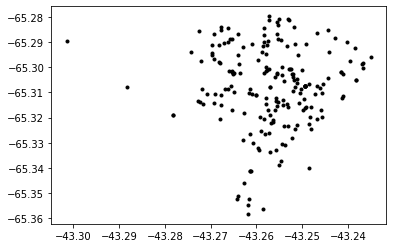

In [239]:
plt.plot(X[:,1],X[:,2],'k.')
plt.show()

In [249]:
n = 4
k_means = KMeans(n_clusters=n)
k_means.fit(X[:,1],X[:,2])

ValueError: Expected 2D array, got 1D array instead:
array=[-43.2578047 -43.2493016 -43.2520243 -43.2514981 -43.2485344 -43.2724624
 -43.2682272 -43.252071  -43.2554564 -43.2495601 -43.2697566 -43.2882513
 -43.2556675 -43.2409988 -43.2492231 -43.2385812 -43.2493016 -43.2514934
 -43.2493016 -43.2718371 -43.2626485 -43.2555997 -43.255266  -43.2654796
 -43.2382764 -43.2636274 -43.2576004 -43.2640989 -43.2456796 -43.2543148
 -43.2382764 -43.262783  -43.2575344 -43.2493441 -43.2693317 -43.2459716
 -43.2616731 -43.2641549 -43.2570584 -43.2692023 -43.251114  -43.2677704
 -43.2485757 -43.2594724 -43.2613781 -43.254202  -43.2543576 -43.2394819
 -43.2580047 -43.255577  -43.236849  -43.2591011 -43.254042  -43.2578704
 -43.2652181 -43.2518639 -43.2587821 -43.2466828 -43.2493016 -43.2533204
 -43.2552181 -43.2574342 -43.2499932 -43.2443904 -43.250552  -43.2509039
 -43.2557284 -43.2493016 -43.2510589 -43.2579798 -43.2654146 -43.2692569
 -43.2570402 -43.2560153 -43.2506999 -43.265375  -43.2484228 -43.2560552
 -43.2525881 -43.2528822 -43.2670324 -43.2629367 -43.2515036 -43.2563119
 -43.2510709 -43.2503734 -43.2680417 -43.2553208 -43.256403  -43.2716061
 -43.2413562 -43.2471721 -43.272349  -43.2597665 -43.2612935 -43.2556708
 -43.2579195 -43.258273  -43.2497673 -43.2460667 -43.2401921 -43.2585869
 -43.2608103 -43.2697687 -43.2532567 -43.2649951 -43.2523209 -43.258659
 -43.2544725 -43.2546846 -43.2652681 -43.2493016 -43.2654312 -43.2614109
 -43.2572491 -43.2492631 -43.2613897 -43.2572984 -43.265799  -43.2369948
 -43.24672   -43.248127  -43.2640985 -43.2618584 -43.2444085 -43.2697561
 -43.2610364 -43.2416482 -43.2540677 -43.2721016 -43.2678591 -43.2531039
 -43.266021  -43.2550549 -43.2550284 -43.2592085 -43.2481181 -43.26775
 -43.2640339 -43.2547475 -43.2743583 -43.2538466 -43.2483963 -43.2571074
 -43.2663212 -43.2601032 -43.2584645 -43.2350134 -43.2555715 -43.2728581
 -43.254533  -43.2525523 -43.2661289 -43.2567592 -43.265093  -43.2616016
 -43.2468089 -43.2416482 -43.2529538 -43.2532014 -43.2680983 -43.2677301
 -43.2530956 -43.2629799 -43.2649711 -43.2427867 -43.2781818 -43.2617642
 -43.3014766 -43.2678512 -43.2493016 -43.2691362 -43.2441673 -43.2662305
 -43.2600922 -43.2457583 -43.2638009 -43.2707923 -43.2366648 -43.2556014
 -43.2520168 -43.2410558 -43.2668814 -43.2609342 -43.2572845 -43.2581912
 -43.2781818 -43.2455498 -43.258396  -43.2571074 -43.2572489 -43.2596316
 -43.2583552 -43.2614977 -43.2517859 -43.258376  -43.2522481 -43.2579353].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [241]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

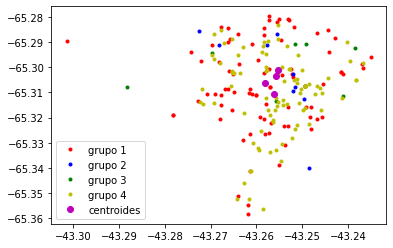

In [243]:
plt.plot(X[etiquetas==0,1],X[etiquetas==0,2],'r.', label='grupo 1')
plt.plot(X[etiquetas==1,1],X[etiquetas==1,2],'b.', label='grupo 2')
plt.plot(X[etiquetas==2,1],X[etiquetas==2,2],'g.', label='grupo 3')
plt.plot(X[etiquetas==3,1],X[etiquetas==3,2],'y.', label='grupo 4')


plt.plot(centroides[:,1],centroides[:,2],'mo',markersize=6, label='centroides')

plt.legend(loc='best')
plt.show()

In [212]:
cl1 = X[etiquetas==0,0],X[etiquetas==0,1]
cant_cl1 = len(X[etiquetas==0,0])
cant_cl2 = len(X[etiquetas==1,0])
cant_cl3 = len(X[etiquetas==2,0])
cant_cl4 = len(X[etiquetas==3,0])

X[0:22,0],X[0:22,1]

(array([-43.2578047, -43.2493016, -43.2520243, -43.2514981, -43.2485344,
        -43.2724624, -43.2682272, -43.252071 , -43.2554564, -43.2495601,
        -43.2697566, -43.2882513, -43.2556675, -43.2409988, -43.2492231,
        -43.2385812, -43.2493016, -43.2514934, -43.2493016, -43.2718371,
        -43.2626485, -43.2555997]),
 array([-65.2911966, -65.3076351, -65.3027024, -65.3078508, -65.3400394,
        -65.2856333, -65.2910388, -65.3094011, -65.2868373, -65.312594 ,
        -65.2944534, -65.3077672, -65.3134008, -65.3113787, -65.2906758,
        -65.2924477, -65.3076351, -65.2906001, -65.3076351, -65.308794 ,
        -65.318072 , -65.3152142]))

In [203]:
print(cant_cl1)
print(cant_cl2)
print(cant_cl3)
print(cant_cl4)

21
58
55
64


In [208]:
clientes['coord'][21]

(-43.2555997, -65.3152142)

In [222]:
clientes.index[21]

'050004'

In [ ]:
wcss = [] 
for number_of_clusters in range(1, 11): 
    kmeans = KMeans(n_clusters = number_of_clusters)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
wcss

In [ ]:
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10]
plt.plot(ks, wcss)
plt.axvline(3, linestyle='--', color='r')